In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [8]:
import requests
requests.__version__

'2.22.0'

In [9]:
# Import the requests library.
import requests

In [10]:
# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1944833cd9c2ff8fc5f3b999d7a4105e


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | malanje
Processing Record 2 of Set 13 | cabo san lucas
Processing Record 3 of Set 13 | hilo
Processing Record 4 of Set 13 | bundaberg
Processing Record 5 of Set 13 | yellowknife
Processing Record 6 of Set 13 | lakota
Processing Record 7 of Set 13 | kodiak
Processing Record 8 of Set 13 | coquimbo
Processing Record 9 of Set 13 | punta arenas
Processing Record 10 of Set 13 | hermanus
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | saskylakh
Processing Record 13 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 13 | nishihara
Processing Record 15 of Set 13 | severo-kurilsk
Processing Record 16 of Set 13 | bethel
Processing Record 17 of Set 13 | kruisfontein
Processing Record 18 of Set 13 | rikitea
Processing Record 19 of Set 13 | albany
Processing Record 20 of Set 13 | vagay
Processing Record 21 of Set 13 | mataura
Processing Record 22 of Set 13 | jamestown
Processing Record 23 of Set 13 | bluff
Processin

Processing Record 31 of Set 16 | qaanaaq
Processing Record 32 of Set 16 | tungkang
City not found. Skipping...
Processing Record 33 of Set 16 | celestun
Processing Record 34 of Set 16 | fairhope
Processing Record 35 of Set 16 | ketchikan
Processing Record 36 of Set 16 | wasilla
Processing Record 37 of Set 16 | indramayu
Processing Record 38 of Set 16 | iqaluit
Processing Record 39 of Set 16 | dandong
Processing Record 40 of Set 16 | bad munstereifel
Processing Record 41 of Set 16 | atuona
Processing Record 42 of Set 16 | leningradskiy
Processing Record 43 of Set 16 | lazaro cardenas
Processing Record 44 of Set 16 | malinovskiy
Processing Record 45 of Set 16 | eskasem
City not found. Skipping...
Processing Record 46 of Set 16 | puerto madero
Processing Record 47 of Set 16 | pauini
Processing Record 48 of Set 16 | sukhobuzimskoye
Processing Record 49 of Set 16 | port moresby
Processing Record 50 of Set 16 | tarut
Processing Record 1 of Set 17 | huilong
Processing Record 2 of Set 17 | aca

Processing Record 15 of Set 20 | makakilo city
Processing Record 16 of Set 20 | karaul
City not found. Skipping...
Processing Record 17 of Set 20 | xinyu
Processing Record 18 of Set 20 | faya
Processing Record 19 of Set 20 | mount isa
Processing Record 20 of Set 20 | port lincoln
Processing Record 21 of Set 20 | odessa
Processing Record 22 of Set 20 | port augusta
Processing Record 23 of Set 20 | nouadhibou
Processing Record 24 of Set 20 | taldan
Processing Record 25 of Set 20 | ucluelet
Processing Record 26 of Set 20 | waingapu
Processing Record 27 of Set 20 | sarkand
Processing Record 28 of Set 20 | bushenyi
Processing Record 29 of Set 20 | northam
Processing Record 30 of Set 20 | parabel
Processing Record 31 of Set 20 | baglung
Processing Record 32 of Set 20 | nguiu
City not found. Skipping...
Processing Record 33 of Set 20 | urozhaynoye
Processing Record 34 of Set 20 | bam
Processing Record 35 of Set 20 | codrington
Processing Record 36 of Set 20 | el tarra
Processing Record 37 of 

Processing Record 50 of Set 23 | taburao
City not found. Skipping...
Processing Record 1 of Set 24 | sao geraldo do araguaia
Processing Record 2 of Set 24 | port said
Processing Record 3 of Set 24 | zhuhai
Processing Record 4 of Set 24 | tottenham
Processing Record 5 of Set 24 | gidole
Processing Record 6 of Set 24 | mogadishu
Processing Record 7 of Set 24 | balabac
Processing Record 8 of Set 24 | saquarema
Processing Record 9 of Set 24 | stolbishche
Processing Record 10 of Set 24 | dolbeau
City not found. Skipping...
Processing Record 11 of Set 24 | grindavik
Processing Record 12 of Set 24 | riberalta
Processing Record 13 of Set 24 | luena
Processing Record 14 of Set 24 | gedo
Processing Record 15 of Set 24 | maumere
Processing Record 16 of Set 24 | mechelen
Processing Record 17 of Set 24 | saint-georges
Processing Record 18 of Set 24 | cutler
Processing Record 19 of Set 24 | kidal
Processing Record 20 of Set 24 | el alto
Processing Record 21 of Set 24 | arapongas
Processing Record 22

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Malanje,-9.54,16.35,63.32,99,100,3.24,AO,2020-01-09 02:17:23
1,Cabo San Lucas,22.89,-109.91,69.01,56,40,4.70,MX,2020-01-09 02:17:23
2,Hilo,19.71,-155.08,82.40,54,40,8.05,US,2020-01-09 02:13:26
3,Bundaberg,-24.87,152.35,90.00,45,40,13.87,AU,2020-01-09 02:12:23
4,Yellowknife,62.45,-114.38,-34.01,73,20,5.82,CA,2020-01-09 02:13:43
5,Lakota,5.85,-5.68,69.71,81,4,1.97,CI,2020-01-09 02:17:24
6,Kodiak,39.95,-94.76,42.80,48,1,14.99,US,2020-01-09 02:17:24
7,Coquimbo,-29.95,-71.34,60.80,87,0,4.70,CL,2020-01-09 02:17:24
8,Punta Arenas,-53.16,-70.91,48.20,66,40,19.46,CL,2020-01-09 02:17:24
9,Hermanus,-34.42,19.24,64.00,88,0,17.87,ZA,2020-01-09 02:17:24


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578536366.412717

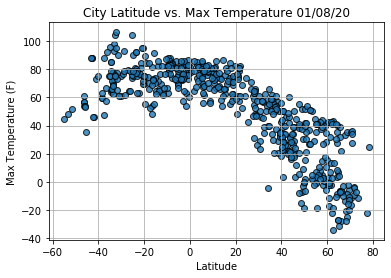

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

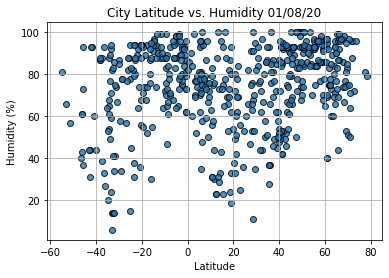

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

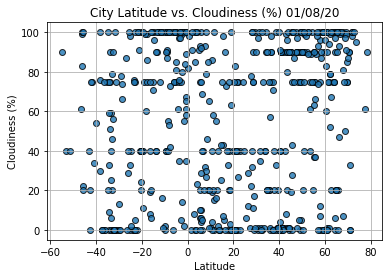

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

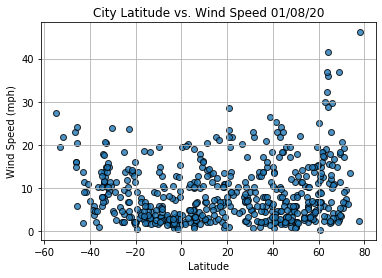

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City               Severo-Kurilsk
Lat                         50.68
Lng                        156.12
Max Temp                    21.51
Humidity                       84
Cloudiness                     99
Wind Speed                   8.41
Country                        RU
Date          2020-01-09 02:17:26
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
543     True
544    False
545    False
546     True
547     True
Name: Lat, Length: 548, dtype: bool

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]